<a href="https://colab.research.google.com/github/arventa/arlan_april/blob/main/Arlan_Arventa_Data_Engineer_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [ ]:
# Import data for Q2
data_palm = pd.read_csv('/content/sample_data/palm_ffb.csv')
print(data_palm.head())

         Date  SoilMoisture  Average_Temp  Min_Temp  Max_Temp  Precipitation  \
0  01.01.2008         616.4     25.306452      21.3      32.2          184.4   
1  01.02.2008         568.9     26.165517      20.9      35.1          140.2   
2  01.03.2008         577.6     25.448387      21.3      32.9          280.4   
3  01.04.2008         581.1     26.903333      20.6      34.8          173.3   
4  01.05.2008         545.4     27.241935      20.9      35.0          140.6   

   Working_days  HA_Harvested  FFB_Yield  
0            25   777778.3951       1.62  
1            23   767988.2759       1.45  
2            25   783951.9231       1.56  
3            25   788987.0504       1.39  
4            25   813659.7222       1.44  


In [ ]:
# Correlation Analysis
cor_table = data_palm.drop('Date', axis=1).corr().round(3)
print(cor_table)

               SoilMoisture  Average_Temp  Min_Temp  Max_Temp  Precipitation  \
SoilMoisture          1.000        -0.650     0.016    -0.500          0.552   
Average_Temp         -0.650         1.000     0.180     0.761         -0.369   
Min_Temp              0.016         0.180     1.000    -0.125          0.346   
Max_Temp             -0.500         0.761    -0.125     1.000         -0.461   
Precipitation         0.552        -0.369     0.346    -0.461          1.000   
Working_days         -0.057         0.076     0.068    -0.039          0.128   
HA_Harvested         -0.327         0.447     0.024     0.315         -0.266   
FFB_Yield            -0.003        -0.005     0.104    -0.071          0.290   

               Working_days  HA_Harvested  FFB_Yield  
SoilMoisture         -0.057        -0.327     -0.003  
Average_Temp          0.076         0.447     -0.005  
Min_Temp              0.068         0.024      0.104  
Max_Temp             -0.039         0.315     -0.071  
Prec

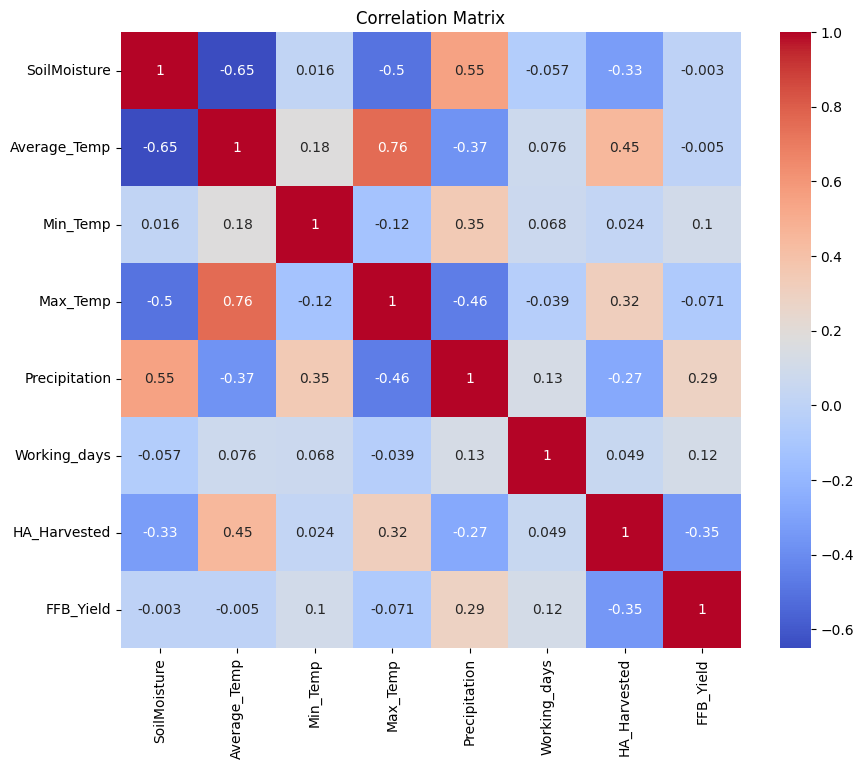

In [ ]:
# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cor_table, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Note : SoilMoisture, Average_Temp and Min_Temp are correlated.

In [ ]:
# Linear Model
X = data_palm.drop(['Date', 'FFB_Yield'], axis=1)
y = data_palm['FFB_Yield']

lm_fit = LinearRegression()
lm_fit.fit(X, y)

LinearRegression()

In [ ]:
# Print summary of linear regression
print('Coefficients:', lm_fit.coef_)
print('Intercept:', lm_fit.intercept_)
print('R-squared:', lm_fit.score(X, y))

Coefficients: [-1.10573931e-03  9.13275989e-02 -2.48853822e-02 -1.29366180e-02
  1.31580864e-03  1.39757385e-02 -3.30754402e-06]
Intercept: 2.733091346160263
R-squared: 0.2540389162000596


Note :

Soil Moisture is negatively associated with FFB_Yield.

Temperature variables show no significant association with FFB_Yield.

Precipitation is positively associated with FFB_Yield.

HA_Harvested is negatively associated with FFB_Yield.


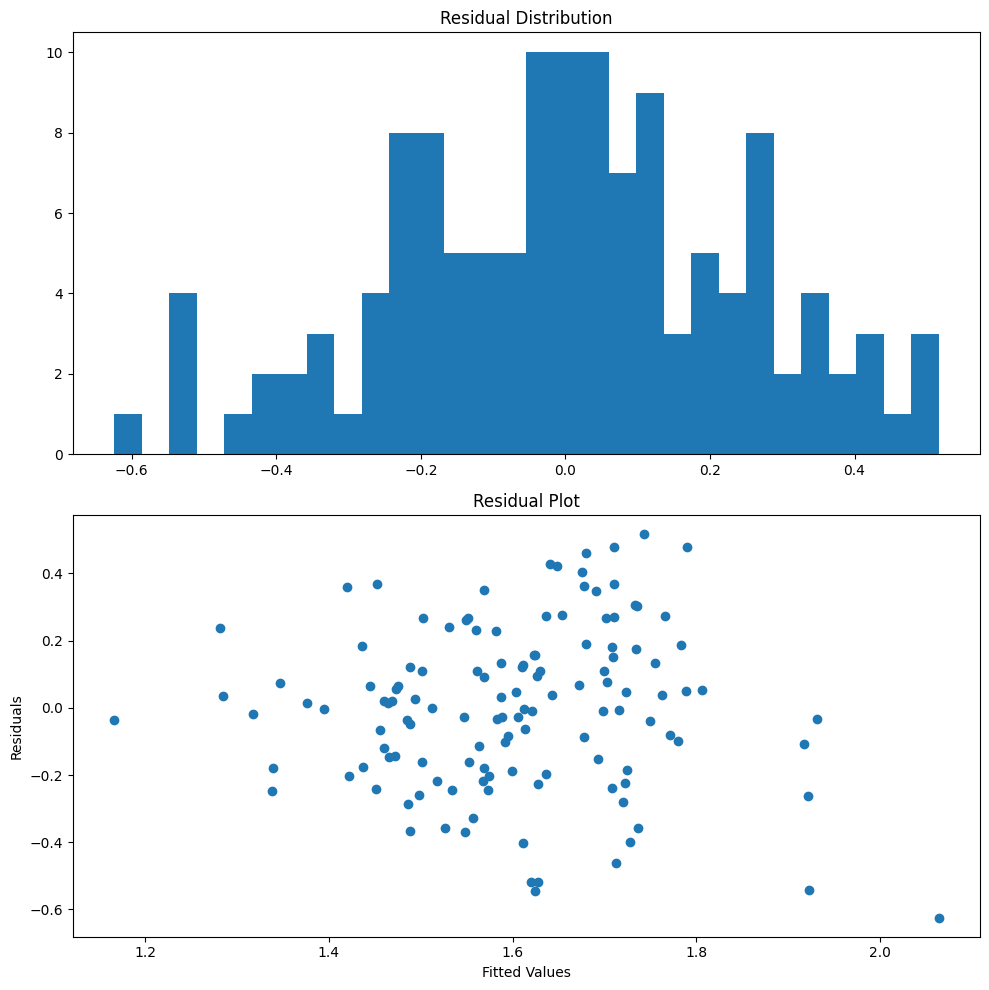

In [ ]:
# Residual Analysis for linear model
residuals = y - lm_fit.predict(X)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.hist(residuals, bins=30)
ax1.set_title('Residual Distribution')
ax2.scatter(lm_fit.predict(X), residuals)
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
plt.tight_layout()
plt.show()

Note : No heteroskedasticity is found. Linear model is considered to be robust, and results are valid

In [ ]:
# Random Forest
rf_fit = RandomForestRegressor(n_estimators=100, random_state=42)
rf_fit.fit(X, y)

RandomForestRegressor(random_state=42)

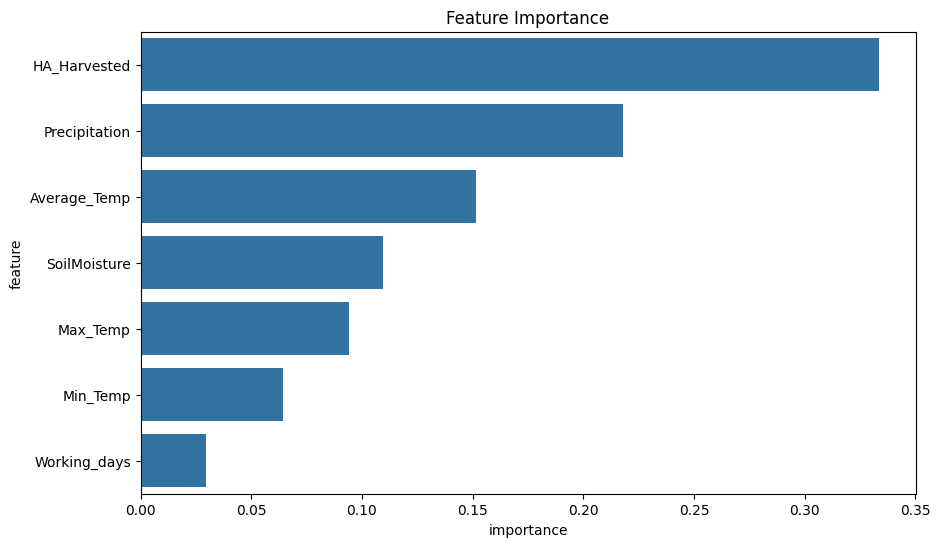

In [ ]:
# Plot feature importance
importances = pd.DataFrame({'feature': X.columns, 'importance': rf_fit.feature_importances_})
importances = importances.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importance')
plt.show()

Note :

HA_Harvested has the highest importance score.

Precipitation hsa the second highest importance score.

Average Temperature has the third highest importance score.

In [ ]:
# Best subsets selection with linear model
def best_subset_selection(X, y, max_features):
    best_score = float('-inf')
    best_subset = None

    for k in range(1, max_features + 1):
        selector = RFE(estimator=LinearRegression(), n_features_to_select=k)
        selector = selector.fit(X, y)
        score = selector.score(X, y)

        if score > best_score:
            best_score = score
            best_subset = selector.support_

    return best_subset

In [ ]:
best_subset = best_subset_selection(X, y, len(X.columns))
best_features = X.columns[best_subset]

print("Best subset of features:", best_features)

Best subset of features: Index(['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation',
       'Working_days', 'HA_Harvested'],
      dtype='object')


In [ ]:
adj_r2_scores = []
for k in range(1, len(X.columns) + 1):
    selector = RFE(estimator=LinearRegression(), n_features_to_select=k)
    selector = selector.fit(X, y)
    score = selector.score(X, y)
    adj_r2 = 1 - (1 - score) * (len(y) - 1) / (len(y) - k - 1)
    adj_r2_scores.append(adj_r2)

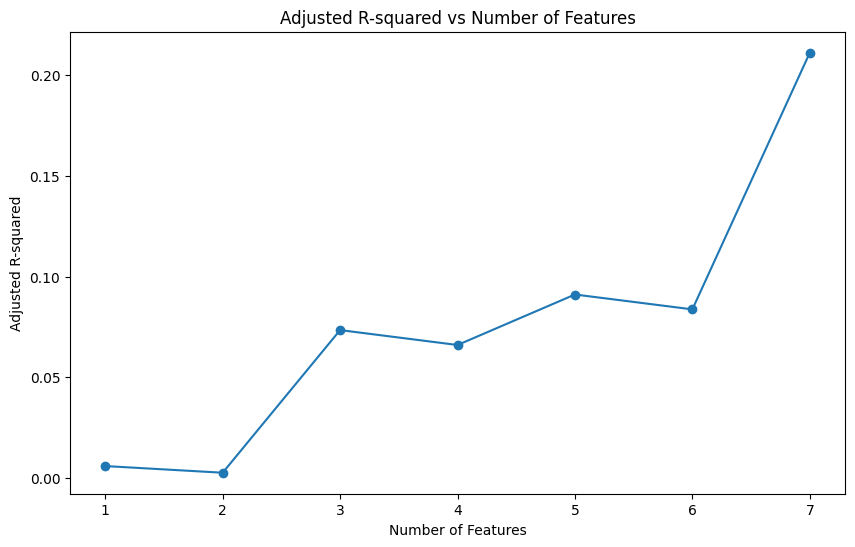

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns) + 1), adj_r2_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Adjusted R-squared')
plt.title('Adjusted R-squared vs Number of Features')
plt.show()

Note : The most important three variables are HA_Harvested, Precipitation, SoilMoisture

Conc:

The most important three variables are HA_Harvested, Precipitation and SoilMoisture. Although Average_Temp has a high importance in random forest. However, SoilMoisture is positively affected by Average_Temp which has shown in correlation analysis. However, the reverse does not make scientific sense. Hence, it would be enough to consider SoilMoisture and drop Average_Temp.